In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import style
style.use(['ggplot']) #analogus to CSS styling for HTML


In [53]:
xs = np.array([1,2,3,4,5], dtype = np.float64) #float64 gives much higher accuracy/precision
ys = np.array([5,4,6,5,6], dtype = np.float64)

In [54]:
def best_fit_slope_intercept(xs,ys):
    m = ((mean(xs)*mean(ys))-mean(xs*ys))/(mean(xs)*mean(xs) - mean(xs*xs))
    c = mean(ys)-m*mean(xs)
    return m, c
m, c = best_fit_slope_intercept(xs,ys)
#print(m,c)

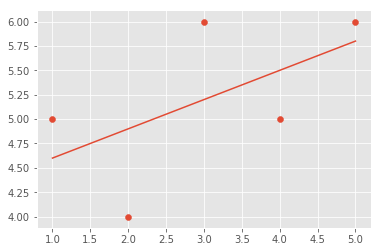

In [55]:
regression_line = []
for x in xs:
    regression_line.append((m*x)+c)
    
plt.scatter(xs,ys) #plotting points(scattering the points on the graph)
plt.plot(xs, m*xs + c) #plotting a line between the given values
plt.show()

In [56]:
def predict(x):
    return (m*x + c)

In [57]:
predict(25)

11.799999999999976

In [58]:
df = pd.read_csv('bike sharing hour.csv')
#print(df)
#x_temp = df['season']
#y_temp = df['cnt']
#plt.scatter(x_temp, y_temp)
#print(df.shape)
#print(df.describe)
df.drop(['instant'], 1, inplace = True)
df.drop(['dteday'], 1, inplace = True)
full_data = df.astype(float).values.tolist()
#print(full_data)

In [59]:
header = list(df) #list(df) returns a list of all the columns/features present in the dataframe

In [60]:
#np.array() gives a matrix just as in MATLAB
#[:,:-1] signifies -> take all rows,take all columns but the last one
#[:,-1] signifies -> take all rows, take only last column
xs  = np.array(full_data)[:,:-1] 
ys = np.array(full_data)[:,-1]
#print(xs)
#print(ys)

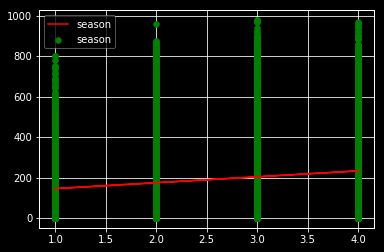

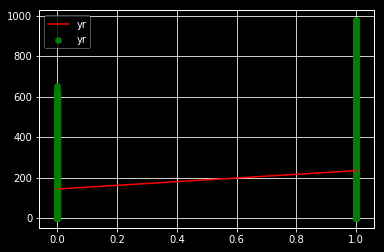

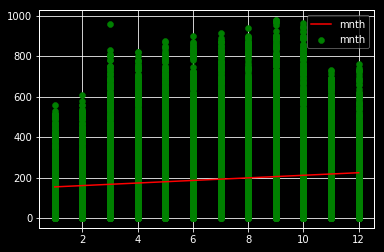

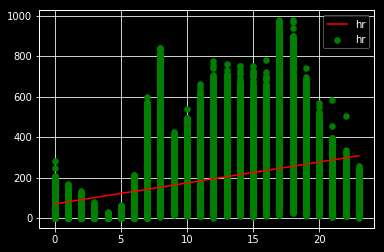

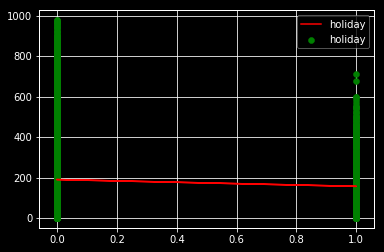

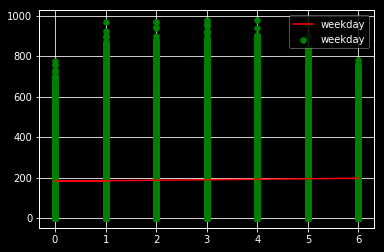

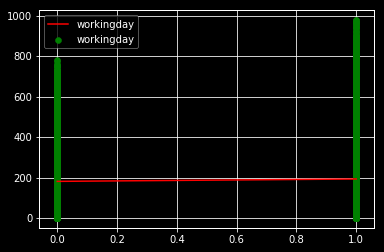

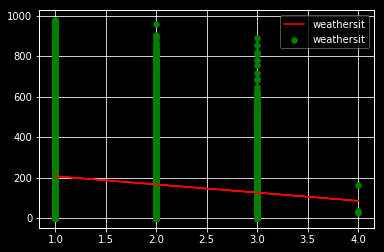

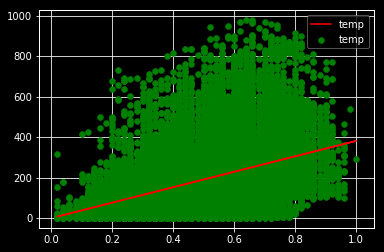

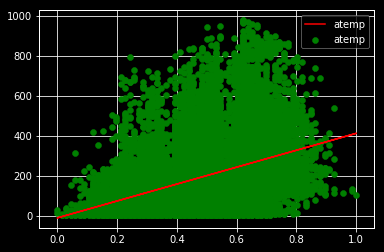

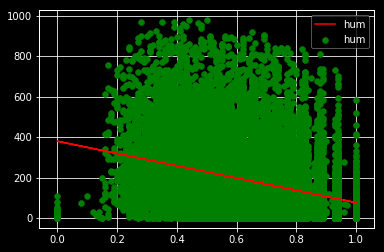

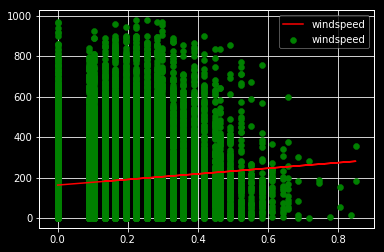

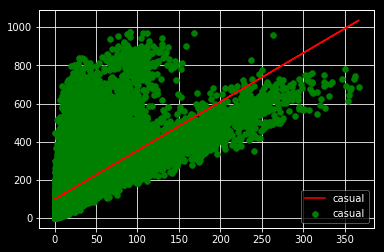

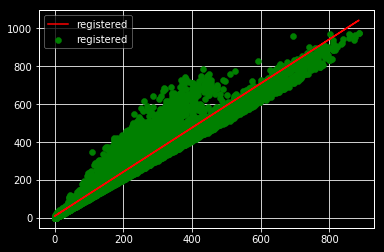

In [70]:
m, c = [], []
for i in range(len(xs[0])):
    m1, c1 = best_fit_slope_intercept(xs[:,i], ys) #Why are we plotting y with all values of each column/feature?
    #Because we want to see which features follow a trend, i.e, a linear plot fits well to the data
    m.append(m1)
    c.append(c1)
    style.use('dark_background')
    plt.scatter(xs[:,i], ys, label = header[i], color = 'g')
    plt.plot(xs[:,i], m1*xs[:,i] + c1, label = header[i], color = 'r')
    plt.legend(loc = 'best')
    plt.savefig('plot_' + header[i] + '.png')
    plt.show()

In [62]:
print('m = ', m)
print('c = ', c)

m =  [29.177497771965506, 90.87191368885652, 6.3633675198374835, 10.33779216990596, -33.55857989217373, 2.4326305994534225, 11.802422015538353, -40.40675269739607, 381.2949222591751, 423.18017240903833, -303.5922582094886, 138.23296243514483, 2.555222246702297, 1.1650320363746498]
c =  [116.47149472731618, 143.7944476576056, 147.86081951758246, 70.09516701034589, 190.42857989217373, 182.15623741745395, 181.40533188248102, 247.05416101700334, -0.035596112642366506, -11.875502114814282, 379.88490740324147, 163.18533236292933, 98.3024206379183, 10.296458231132732]
